In [ ]:
!unzip test_all.zip

In [ ]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/monkey/n02488702_1549.JPEG  
  inflating: train/monkey/n02484473_925.JPEG  
  inflating: train/monkey/n02484473_1980.JPEG  
  inflating: train/monkey/n02488894_658.JPEG  
  inflating: train/monkey/n02484473_2389.JPEG  
  inflating: train/monkey/n02484473_1320.JPEG  
  inflating: train/monkey/n02484473_1446.JPEG  
  inflating: train/monkey/n02484473_1426.JPEG  
  inflating: train/monkey/n02488702_72.JPEG  
  inflating: train/monkey/n02488702_2650.JPEG  
  inflating: train/monkey/n02488702_4894.JPEG  
  inflating: train/monkey/n02488702_1992.JPEG  
  inflating: train/monkey/n02488702_4695.JPEG  
  inflating: train/monkey/n02484473_1574.JPEG  
  inflating: train/monkey/n02488702_3344.JPEG  
  inflating: train/monkey/n02488702_6259.JPEG  
  inflating: train/monkey/n02488702_5925.JPEG  
  inflating: train/monkey/n02484473_649.JPEG  
  inflating: train/monkey/n02488702_5615.JPEG  
  inflating: train/monkey/n02488702_6342.J

In [ ]:
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import numpy as np

In [ ]:
torch.cuda.set_device(0)
device = torch.device("cuda")

In [ ]:
torch.manual_seed(42)
if torch.cuda.is_available(): 
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
    
# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

In [ ]:
transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(0.5),
     transforms.RandomVerticalFlip(0.5),
     transforms.RandomRotation(24),
     transforms.ToTensor(),
     transforms.RandomErasing(0.4),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

In [ ]:
full_dataset = torchvision.datasets.ImageFolder("train", transform=transform)


In [ ]:
classes = full_dataset.classes

In [ ]:
classes

['acoustic',
 'antenna',
 'bacteria',
 'battery',
 'bean',
 'beetle',
 'bicycle',
 'birch',
 'bird',
 'bomb',
 'bread',
 'bridge',
 'camera',
 'carbon',
 'cat',
 'corn',
 'crab',
 'crocodilian',
 'echinoderm',
 'egg',
 'elephant',
 'fish',
 'flower',
 'frog',
 'fungus',
 'gauge',
 'hammer',
 'icecream',
 'kangaroo',
 'memorial',
 'monkey',
 'motor',
 'nest',
 'palm',
 'pizza',
 'pot',
 'printer',
 'saw',
 'snake',
 'spice',
 'spider',
 'spoon',
 'squash',
 'swine',
 'tea',
 'tomato',
 'towel',
 'truck',
 'turtle',
 'worm']

In [ ]:
train_size = int(0.8 * len(full_dataset))
validation_size = len(full_dataset) - train_size
trainset, validation_set = torch.utils.data.random_split(full_dataset, [train_size, validation_size])

In [ ]:

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


In [ ]:
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


In [ ]:
validation_set[0]

(tensor([[[-1.0000, -1.0000, -1.0000,  ...,  0.0588, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ...,  0.4039, -1.0000, -1.0000],
          [-0.1529,  0.4667,  0.9216,  ...,  0.4510, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000,  0.2235,  ..., -0.0510, -0.0275,  0.0667],
          [-1.0000, -1.0000,  0.0353,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -0.0745,  ..., -1.0000, -1.0000, -1.0000]],
 
         [[-1.0000, -1.0000, -1.0000,  ..., -0.0902, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ...,  0.2706, -1.0000, -1.0000],
          [-0.1765,  0.4588,  0.9059,  ...,  0.3412, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000,  0.0275,  ..., -0.0275,  0.0275,  0.1451],
          [-1.0000, -1.0000, -0.1765,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -0.2863,  ..., -1.0000, -1.0000, -1.0000]],
 
         [[-1.0000, -1.0000, -1.0000,  ...,  0.0588, -1.0000, -1.0000],
          [-1.0000, -1.0000,

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

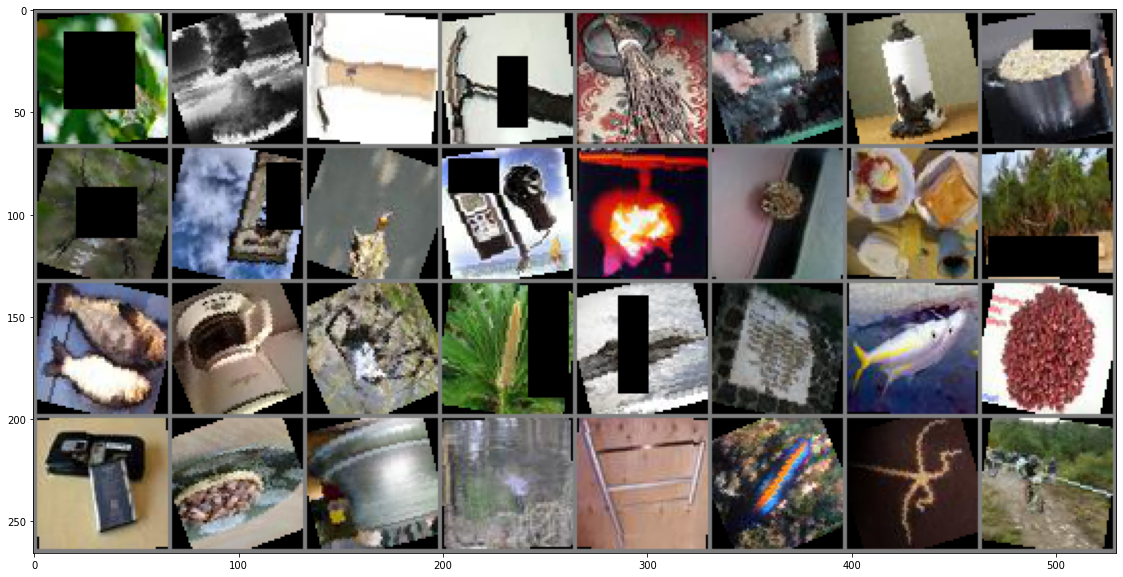

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (20,10))

# get some random training images
dataiter = iter(validation_loader)
images, labels = dataiter.next()

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
imshow(torchvision.utils.make_grid(images))


In [ ]:
images[0:1].size()

torch.Size([1, 3, 64, 64])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        ## Warstwa konwolucyjna = ekstrakcja cech
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5, stride=1, padding=0)
        
        
        ## Warstwa max pooling = faktyczny klasyfikator w oparciu o cechy
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(12, 32, 5)
        self.pool2 = nn.MaxPool2d(2)  ### obrazki sie zmniejszaja, dopytac na kons
        self.fc1 = nn.Linear(32 * 13 * 13, 1200) ### dopytac o to 16 x 5 x 5
        self.fc2 = nn.Linear(1200, 300)
        self.fc3 = nn.Linear(300, 50)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        # mozna zawsze robic print(x.size()) i break, zeby wiedziec czemu 16x5x5
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



In [ ]:
net = Net().to(device)
net

Net(
  (conv1): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=5408, out_features=1200, bias=True)
  (fc2): Linear(in_features=1200, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=50, bias=True)
)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
training_loss = 0
validation_loss = 0
num_epochs = 200

# Training loop
for epoch in range(num_epochs):
  net.train()
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    training_loss += loss.item()

  net.eval()
  with torch.no_grad():
      for i, data in enumerate(validation_loader, 0):
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)
          outputs = net(inputs)
          loss = criterion(outputs, labels) 
          validation_loss += loss.item()

  if epoch and (epoch % 10 == 0 or epoch == num_epochs - 1):    
      print(f"Epoch: {epoch}, training loss: {training_loss/10:.3}, validation loss: {validation_loss/10:.3}")
      training_loss = 0
      validation_loss = 0

Epoch: 10, training loss: 6.2e+03, validation loss: 1.58e+03
Epoch: 20, training loss: 4.86e+03, validation loss: 1.33e+03
Epoch: 30, training loss: 4.61e+03, validation loss: 1.34e+03
Epoch: 40, training loss: 4.44e+03, validation loss: 1.34e+03
Epoch: 50, training loss: 4.32e+03, validation loss: 1.34e+03
Epoch: 60, training loss: 4.23e+03, validation loss: 1.35e+03


In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
acc_sum = 0
with torch.no_grad():
    for i, data in enumerate(validation_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        loss = criterion(outputs, labels) 
        validation_loss += loss.item()
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
          if label == prediction:
              correct_pred[classes[label]] += 1
          total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    acc_sum += accuracy

    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, 
                                                   accuracy))
    
  

In [ ]:
acc_average_all_classes = acc_sum / len(classes)

In [ ]:
acc_average_all_classes

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class LongNet(nn.Module):
    def __init__(self):
        super().__init__()
        out_channels1 = 12
        out_channels2 = 32
        self.n_convs = 20
        ## Warstwa konwolucyjna = ekstrakcja cech
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=out_channels1, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(out_channels1, out_channels2, 5)

        self.convs = [nn.Conv2d(in_channels=out_channels2, out_channels=out_channels2, kernel_size=5, stride=1, padding=2) for _ in range(self.n_convs)]
        self.bns = [nn.BatchNorm2d(out_channels2) for _ in range(self.n_convs)]
        ## Warstwa max pooling = faktyczny klasyfikator w oparciu o cechy
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.pool2 = nn.MaxPool2d(2)  ### obrazki sie zmniejszaja, dopytac na kons
        self.fc1 = nn.Linear(out_channels2 * 14 * 14, 1200) ### dopytac o to 16 x 5 x 5
        self.fc2 = nn.Linear(1200, 300)
        self.fc3 = nn.Linear(300, 50)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        for i in range(self.n_convs):
            x = F.relu(self.convs[i](x))
            x = self.bns[i](x)
        x = self.pool1(x)
        x = self.pool2(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        # mozna zawsze robic print(x.size()) i break, zeby wiedziec czemu 16x5x5
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
long_net = LongNet().to(device)
for conv in long_net.convs:
    conv.to(device)
for bn in long_net.bns:
    bn.to(device)
long_net

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(long_net.parameters(), lr=0.001)

In [ ]:
training_loss = 0
validation_loss = 0
num_epochs = 100

# Training loop
for epoch in range(num_epochs):
  long_net.train()
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward + backward + optimize
    outputs = long_net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    training_loss += loss.item()
    
  long_net.eval()
  with torch.no_grad():
      for i, data in enumerate(validation_loader, 0):
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)
          outputs = long_net(inputs)
          loss = criterion(outputs, labels) 
          validation_loss += loss.item()

  if epoch and (epoch % 10 == 0 or epoch == num_epochs - 1):    
      print(f"Epoch: {epoch}, training loss: {training_loss/10:.3}, validation loss: {validation_loss/10:.3}")
      training_loss = 0
      validation_loss = 0

In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
acc_sum = 0
with torch.no_grad():
    for i, data in enumerate(validation_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = long_net(inputs)
        loss = criterion(outputs, labels) 
        validation_loss += loss.item()
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
          if label == prediction:
              correct_pred[classes[label]] += 1
          total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    acc_sum += accuracy

    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, 
                                                   accuracy))

In [ ]:
acc_average_all_classes = acc_sum / len(classes)
acc_average_all_classes